### RELEVANT IMPORTS

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

#### TESTING NEGATIVE POTENTIAL

In [59]:
def const_neg_potential(x, t, period=100):
    t = 25                                   # re-define t to place minima on negative.
    a1 = 0
    a2 = -3.2
    sin_scale = 3
    a3 = sin_scale*np.sin(2*np.pi*t/period)
    a4 = 0.1
    a5 = -(3/5) * a3
    a6 = 1

    all_scale = 1.13
    
    return all_scale*(a6*6*x**5 + a5*5*x**4 + a4*4*x**3 + a3*3*x**2 + a2*2*x + a1)

In [60]:
t = np.arange(0,100,0.1)
x = np.arange(-1.1,1.1, 0.01)

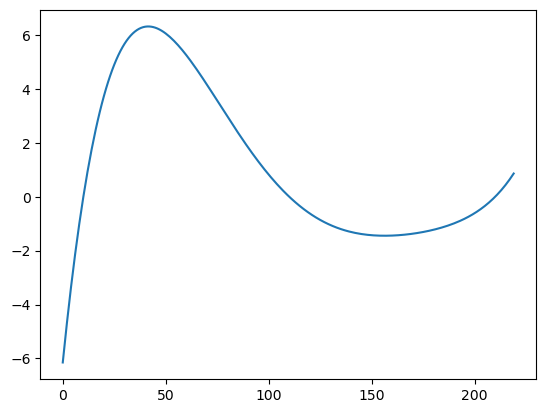

In [61]:
plt.plot(const_neg_potential(x, 25))

#### GENERATING DATA

In [130]:
time_horizon = 1000
dt = 0.01
num_steps = int(time_horizon/dt)

x_init = 0

In [131]:
def euler_maruyama(mu: callable, sigma: callable):
    x = np.zeros((num_steps, ))
    x[0] = x_init

    for i in tqdm(range(num_steps - 1)):
        curr_t = 0
        curr_x = x[i]
        dW = noise[i]

        x[i+1] = curr_x + mu(curr_x, curr_t)*dt + sigma(curr_x, curr_t) * dW

    return x

In [238]:
deep_well_val = 4.29
epsilon = deep_well_val / np.log(time_horizon)
print(epsilon)

0.6210411091216501


In [236]:
def mu(x, t):
    return -const_neg_potential(x, t)

def sigma_more(x, t):
    augmented_eps = epsilon + 0.2
    return augmented_eps ** (1/2)

  0%|          | 0/99999 [00:00<?, ?it/s]

100%|██████████| 99999/99999 [00:00<00:00, 439438.68it/s]


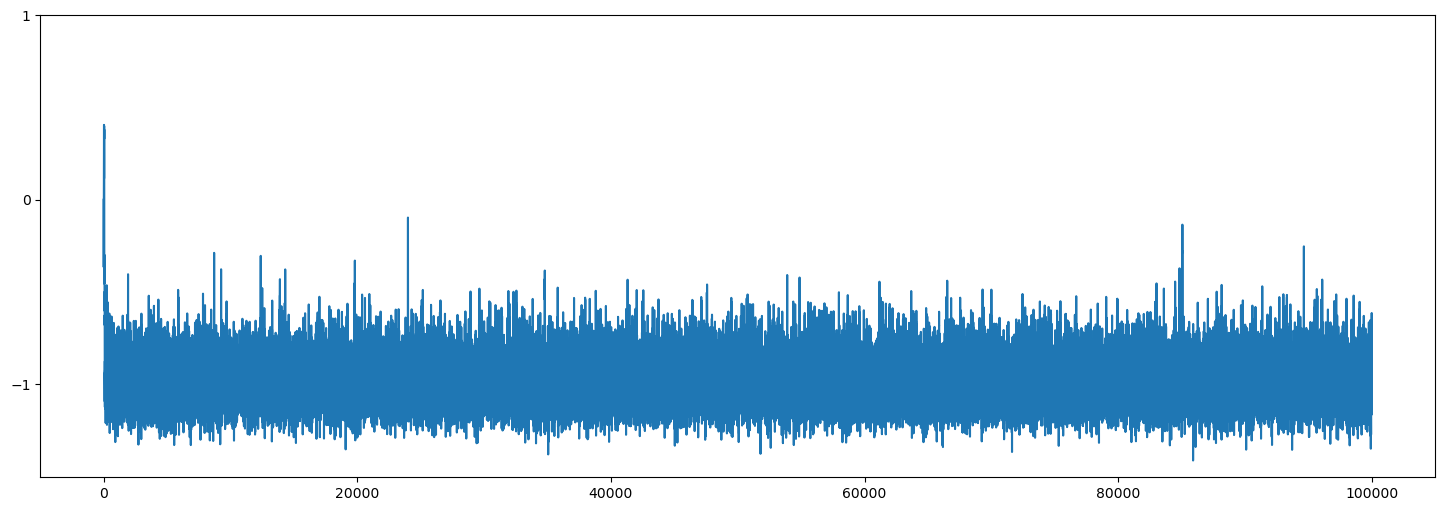

In [237]:
noise = np.random.normal(loc=0.0, scale = dt**(1/2), size=(num_steps, ))
x_sim = euler_maruyama(mu, sigma_more)
plt.figure(figsize=(18,6))
plt.plot(x_sim)
plt.yticks([-1, 0, 1])
plt.show()